In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [2]:
save_path = os.path.join('./result/')

In [3]:
# Work on previously saved data
params_df = pd.read_csv('result//param_Mon_May_23_21_46_49_2022.csv')
results_df = pd.read_csv('result//results_Mon_May_23_21_46_49_2022.csv')
total_df = pd.read_csv('result//total_Mon_May_23_21_47_07_2022.csv')

In [4]:
for index in params_df.columns:
    if (index == 'Unnamed: 0') :
        params_df.drop('Unnamed: 0', axis = 1, inplace=True)

for index in results_df.columns:
    if (index == 'Unnamed: 0') :
        results_df.drop('Unnamed: 0', axis = 1, inplace=True)
for index in total_df.columns:
    if (index == 'Unnamed: 0') :
        total_df.drop('Unnamed: 0', axis = 1, inplace=True)


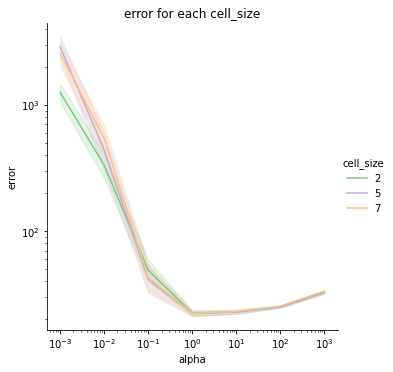

In [5]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line', palette='Accent', hue = 'cell_size')
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='error for each cell_size')
# fig.savefig(os.path.join(save_path, "alpha_error_per_size" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".pdf"), dpi = 200)

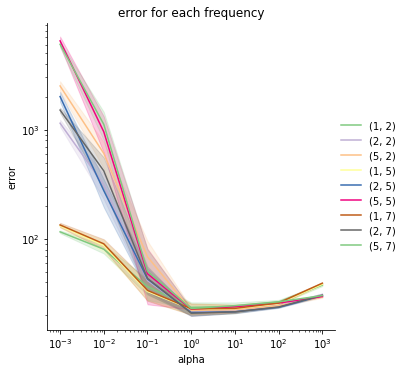

In [6]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line', palette='Accent', 
                  hue = params_df[['sparse_freq', 'cell_size']].apply(tuple, axis = 1))
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='error for each frequency')
# fig.savefig(os.path.join(save_path, "alpha_error_per_freq" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".pdf"), dpi = 200)

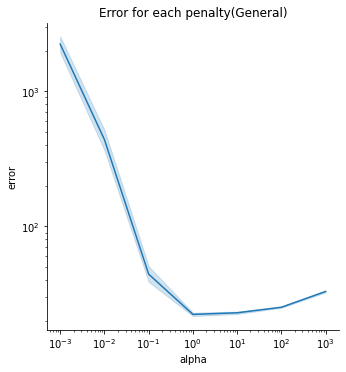

In [7]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line')
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='Error for each penalty(General)')
# fig.savefig(os.path.join(save_path, "alpha_error_general" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".pdf"), dpi = 200)

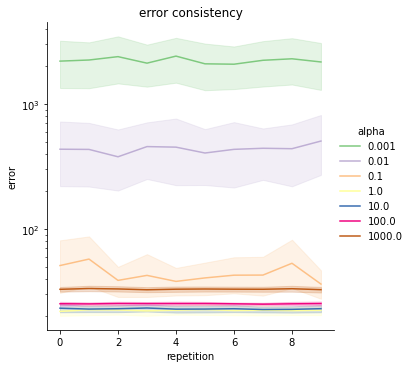

In [8]:
# To show how consistent randomly generated V1 weight would be for each rep. it should be about same for each repetition

fig = sns.relplot(data = params_df, x = 'repetition', y = 'error', kind='line', palette='Accent', hue = 'alpha')
fig.set(title='error consistency')
fig.set(yscale='log')
fig.savefig(os.path.join(save_path, "alpha_error_consistency" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".pdf"), dpi = 200)

In [9]:
params_df.groupby(by=['num_cell', 'cell_size', 'sparse_freq', 'alpha']).mean().sort_values(by='error', ascending= True).drop('repetition', axis = 1).head(1)

,,,,error
num_cell,cell_size,sparse_freq,alpha,
500,7,2,0.01,12.709595


In [10]:
params_df.groupby(by=['num_cell', 'cell_size', 'sparse_freq', 'alpha']).mean().drop('repetition', axis = 1).

SyntaxError: invalid syntax (2520724041.py, line 1)

In [ ]:
compress_param_df = pd.read_csv('result//Compress_param_Wed_May_25_14_52_32_2022.csv')

In [ ]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line', palette='Accent', 
                  hue = params_df[['sparse_freq', 'cell_size']].apply(tuple, axis = 1), legend = False)

fig.set(title='Error for each penalty(General)')
fig.map(sns.lineplot, x = 'alpha', y = 'error', data = compress_param_df, 
        label= 'classical_error', color = 'black', legend = True).add_legend(title='Classical Err', loc = 'right')
fig.set(yscale='log')
fig.set(xscale='log')
plt.legend(title = 'V1', labels =['(1, 2)', '(2, 2)', '(5, 2)', '(1, 5)', '(2, 5)', '(5, 5)', '(1, 7)', '(2, 7)', '(5, 7)'])
# plt.legend(title = 'Classical', label = ['classic'])

# compress_fig = sns.relplot(data = compress_param_df, x = 'alpha', y = 'error', kind= 'line')
# compress_fig.set(yscale='log')
# compress_fig.set(xscale='log')
type(fig)

## Error Vs Num_Cell Graph

In [11]:
# params_df 
# mean_err = params_df.groupby(['num_cell', 'sparse_freq', 'cell_size', 'alpha']).mean().drop('repetition', axis=1)
mean_err = params_df.groupby(['num_cell', 'sparse_freq', 'cell_size', 'alpha'], as_index = False).agg({'error':'mean'})
# params_df
# mean_err[mean_err['num_cell'] == 100]

# mean_err['num_cell'].unique()


mean_err.groupby(['num_cell'], as_index = False).agg({'error':'min'})

,num_cell,error
0,100,23.177108
1,200,19.581861
2,500,12.709595


In [159]:
min_err_df = pd.DataFrame()
# min_err_index = []
for i in mean_err['num_cell'].unique():
#     print(i)
    temp = mean_err.loc[mean_err['num_cell'] == i]
    
    
    
    #hyperparameter for each number of cell
    ## Grabbing values by each values
    min_err_df = min_err_df.append(temp.loc[temp['error'] == temp['error'].min()])
    
    ## grabbing values by index
#     min_err_index.append(temp.loc[temp['error'] == temp['error'].min()].index[0])
#     print(temp.loc[temp['error'] == temp['error'].min()].values.squeeze().tolist())

In [221]:


params_df[(min_err_df.iloc[:, 0:4].head(1).values == params_df.iloc[:, 1:5].values).all(axis=1)]

,repetition,num_cell,cell_size,sparse_freq,alpha,error
86,0,100,5,5,1.0,23.323652
275,1,100,5,5,1.0,23.080329
464,2,100,5,5,1.0,22.865730
653,3,100,5,5,1.0,23.166681
842,4,100,5,5,1.0,22.958887
1031,5,100,5,5,1.0,23.147109
1220,6,100,5,5,1.0,23.117333
1409,7,100,5,5,1.0,22.862780
1598,8,100,5,5,1.0,23.043382
1787,9,100,5,5,1.0,24.205200


In [228]:
num_cell_error_df = pd.DataFrame()
for i in range(len(min_err_df)):
    print(i)
    num_cell_error_df = num_cell_error_df.append(params_df[(min_err_df.iloc[:, 0:4].head(1).values == params_df.iloc[:, 1:5].values).all(axis=1)])
    

0
1
2
3


In [227]:
for i in min_err_df.values

40

In [246]:
params_df[(min_err_df.iloc[:, 0:4].iloc[1].values == params_df.iloc[:, 1:5].values).all(axis=1)]

,repetition,num_cell,cell_size,sparse_freq,alpha,error


In [242]:
min_err_df.iloc[:, 0:4].iloc[1].values

array([200.,   2.,   7.,   1.])

In [244]:
params_df.iloc[:, 1:5].values

array([[1.e+02, 2.e+00, 1.e+00, 1.e-03],
       [1.e+02, 2.e+00, 2.e+00, 1.e-03],
       [1.e+02, 2.e+00, 5.e+00, 1.e-03],
       ...,
       [5.e+02, 7.e+00, 1.e+00, 1.e+03],
       [5.e+02, 7.e+00, 2.e+00, 1.e+03],
       [5.e+02, 7.e+00, 5.e+00, 1.e+03]])

In [255]:
np.unique((min_err_df.iloc[:, 0:4].iloc[1].values == params_df.iloc[:, 1:5].values).all(axis=1))

array([False])

In [261]:
params_df[params_df["num_cell"] == 200.] & params_df[params_df["cell_size"] == 2.]

TypeError: unsupported operand type(s) for &: 'float' and 'float'

In [257]:
min_err_df.iloc[:, 0:4].iloc[1].values

array([200.,   2.,   7.,   1.])